In [1]:
%%HTML
<style> code {background-color : pink !important;} </style>

Vehicle Detection and Tracking
===


In [20]:
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import time
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from scipy.ndimage.measurements import label
import pickle
from random import shuffle
from moviepy.editor import VideoFileClip
from sklearn.cross_validation import train_test_split


In [3]:
## load data

car_images 8792
8792          images of vehicles
8968         images of non-vehicles
fcar: ./data/vehicles/GTI_Right/image0863.png
fncar: ./data/non-vehicles/Extras/extra3286.png


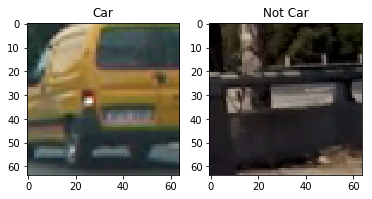

In [4]:
cars = []
notcars = []
# Read in cars
car_images = glob.glob('./data/vehicles/**/*.png', recursive=True)
print('car_images {}'.format(len(car_images)))
for image in car_images:
    cars.append(image)

# Read notcars
notcar_images = glob.glob('./data/non-vehicles/**/*.png', recursive=True)
for image in notcar_images:
    notcars.append(image)

shuffle(car_images)
shuffle(notcar_images)
print(len(car_images), '         images of vehicles')
print(len(notcar_images), '        images of non-vehicles')

plot_car = True
if plot_car:
    # read one car
    fcar = car_images[0]
    print('fcar: {}'.format(fcar))
    car_image = mpimg.imread(fcar)
    plt.subplot(121), plt.imshow(car_image)
    plt.title('Car')
    # rad one not car
    fncar = notcar_images[0]
    print('fncar: {}'.format(fncar))
    ncar_image = mpimg.imread(fncar)
    plt.subplot(122), plt.imshow(ncar_image)
    plt.title('Not Car')

    plt.show()

In [5]:
## visualize HOG feature

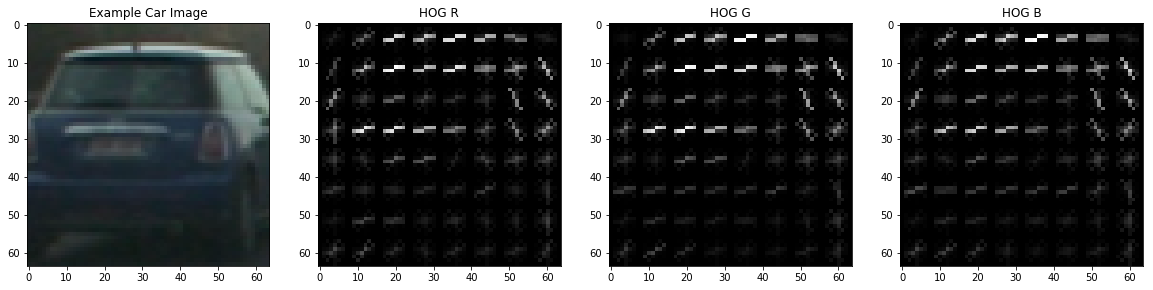

In [6]:
%matplotlib inline
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block,
                     vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=True,
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:
        features = hog(img, orientations=orient,
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),
                       transform_sqrt=True,
                       visualise=vis, feature_vector=feature_vec)
        return features
    
# Generate a random index to look at a car image
ind = 10  #np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
ch1 = image[:, :, 0]
ch2 = image[:, :, 1]
ch3 = image[:, :, 2]
# gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 1
# Call our function with vis=True to see an image output
features1, hog_image1 = get_hog_features(ch1, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features2, hog_image2 = get_hog_features(ch2, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features3, hog_image3 = get_hog_features(ch3, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
# Plot the examples
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.imshow(image)

plt.title('Example Car Image')
plt.subplot(142)
plt.imshow(hog_image1, cmap='gray')
plt.title('HOG R')
plt.subplot(143)
plt.imshow(hog_image2, cmap='gray')
plt.title('HOG G')
plt.subplot(144)
plt.imshow(hog_image3, cmap='gray')
plt.title('HOG B')

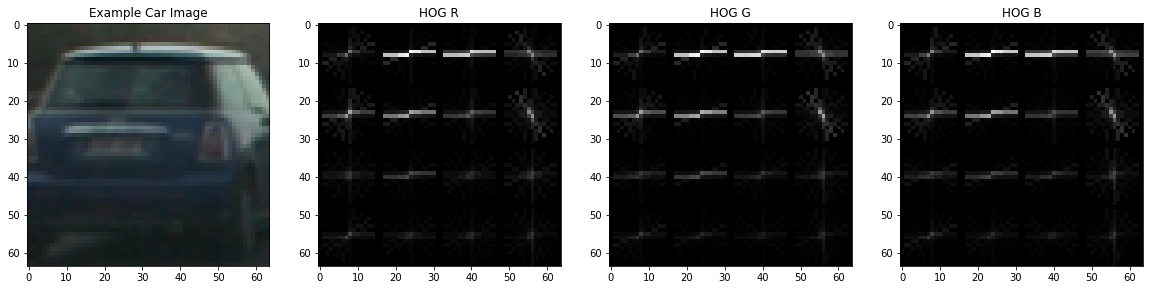

In [7]:
orient = 11
pix_per_cell = 16
cell_per_block = 1
# Call our function with vis=True to see an image output
features1, hog_image1 = get_hog_features(ch1, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features2, hog_image2 = get_hog_features(ch2, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features3, hog_image3 = get_hog_features(ch3, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
# Plot the examples
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.imshow(image)

plt.title('Example Car Image')
plt.subplot(142)
plt.imshow(hog_image1, cmap='gray')
plt.title('HOG R')
plt.subplot(143)
plt.imshow(hog_image2, cmap='gray')
plt.title('HOG G')
plt.subplot(144)
plt.imshow(hog_image3, cmap='gray')
plt.title('HOG B')

In [8]:
## load data

In [10]:
cars = []
notcars = []
# Read in cars
car_images = glob.glob('./data/vehicles/**/*.png', recursive=True)
for image in car_images:
    cars.append(image)

# Read notcars
notcar_images = glob.glob('./data/non-vehicles/**/*.png', recursive=True)
for image in notcar_images:
    notcars.append(image)

shuffle(car_images)
shuffle(notcar_images)
print(len(car_images), '         images of vehicles')
print(len(notcar_images), '        images of non-vehicles')

8792          images of vehicles
8968         images of non-vehicles


In [ ]:
## train model

In [16]:
## help functions

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block,
                     vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=True,
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:
        features = hog(img, orientations=orient,
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),
                       transform_sqrt=True,
                       visualise=vis, feature_vector=feature_vec)
        return features

    
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                     hist_bins=32, orient=9,
                     pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else:
            feature_image = np.copy(image)

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
            # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:, :, channel],
                                                         orient, pix_per_cell, cell_per_block,
                                                         vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)
            else:
                hog_features = get_hog_features(feature_image[:, :, hog_channel], orient,
                                                pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features


In [17]:
color_space = 'RGB'  # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 11  # HOG orientations
pix_per_cell = 16  # HOG pixels per cell
cell_per_block = 1  # HOG cells per block
hog_channel = "ALL"  # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16)  # Spatial binning dimensions
hist_bins = 16  # Number of histogram bins
spatial_feat = False  # Spatial features on or off
hist_feat = False  # Histogram features on or off
hog_feat = True  # HOG features on or off

In [21]:
# check if mode exist
filename = 'finalized_model.sav'
svc = None
if os.path.isfile(filename):
    dd = pickle.load(open(filename, 'rb'))
    svc = dd['model']
    X_scaler = dd['X_scaler']
    print('load svm model {}'.format(filename))
else:
    car_features = extract_features(cars, color_space=color_space,
                                    spatial_size=spatial_size, hist_bins=hist_bins,
                                    orient=orient, pix_per_cell=pix_per_cell,
                                    cell_per_block=cell_per_block,
                                    hog_channel=hog_channel, spatial_feat=spatial_feat,
                                    hist_feat=hist_feat, hog_feat=hog_feat)
    notcar_features = extract_features(notcars, color_space=color_space,
                                       spatial_size=spatial_size, hist_bins=hist_bins,
                                       orient=orient, pix_per_cell=pix_per_cell,
                                       cell_per_block=cell_per_block,
                                       hog_channel=hog_channel, spatial_feat=spatial_feat,
                                       hist_feat=hist_feat, hog_feat=hog_feat)

    X = np.vstack((car_features, notcar_features)).astype(np.float64)
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)

    # Define the labels vector
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

    # Split up data into randomized training and test sets
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(
        scaled_X, y, test_size=0.2, random_state=rand_state)

    svc = SVC()
    # Check the training time for the SVC
    t = time.time()
    svc.fit(X_train, y_train)

    pickle.dump(svc, open(filename, 'wb'))
    t2 = time.time()
    print(round(t2 - t, 2), 'Seconds to train SVC...')
    dd = {'model': svc, 'X_scaler': X_scaler}
    pickle.dump(dd, open(filename, 'wb'))
    print('save svm model {}'.format(filename))
    # Check the score of the SVC
    print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
    print('Feature vector length:', len(X_train[0]))

print('Using:', orient, 'orientations', pix_per_cell,
      'pixels per cell and', cell_per_block, 'cells per block')

17.78 Seconds to train SVC...
save svm model finalized_model.sav
Test Accuracy of SVC =  0.9901
Feature vector length: 528
Using: 11 orientations 16 pixels per cell and 1 cells per block


In [22]:
## Sliding Window Search

In [34]:
### help functions
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, cells_per_step, cspace, svc,
              X_scaler, orient, pix_per_cell, cell_per_block, spatial_size,
              hist_bins,
              spatial_feat=True,
              hist_feat=True,
              draw_all_img=None
              ):
    draw_img = np.copy(img)
    img_tosearch = img[ystart:ystop, :, :]
    img_tosearch = img_tosearch.astype(np.float32) / 255


    # ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    # apply color conversion if other than 'RGB'
    if cspace != 'RGB':
        if cspace == 'HSV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2HSV)
        elif cspace == 'LUV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2LUV)
        elif cspace == 'HLS':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2HLS)
        elif cspace == 'YUV':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YUV)
        elif cspace == 'YCrCb':
            ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YCrCb)
    else:
        ctrans_tosearch = np.copy(img_tosearch)

    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1] / scale), np.int(imshape[0] / scale)))

    ch1 = ctrans_tosearch[:, :, 0]
    ch2 = ctrans_tosearch[:, :, 1]
    ch3 = ctrans_tosearch[:, :, 2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1
    nfeat_per_block = orient * cell_per_block ** 2

    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = cells_per_step  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step

    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)

    window_list = []

    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb * cells_per_step
            xpos = xb * cells_per_step
            # Extract HOG for this patch
            hog_features = []
            hog_feat1 = hog1[ypos:ypos + nblocks_per_window, xpos:xpos + nblocks_per_window].ravel()
            hog_feat2 = hog2[ypos:ypos + nblocks_per_window, xpos:xpos + nblocks_per_window].ravel()
            hog_feat3 = hog3[ypos:ypos + nblocks_per_window, xpos:xpos + nblocks_per_window].ravel()

            hog_features.extend(hog_feat1)
            hog_features.extend(hog_feat2)
            hog_features.extend(hog_feat3)
            # hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos * pix_per_cell
            ytop = ypos * pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop + window, xleft:xleft + window], (window, window))

            # Get color features
            spatial_features = []
            hist_features = []
            if spatial_feat:
                spatial_features = bin_spatial(subimg, size=spatial_size)
            if hist_feat:
                hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            # test_features = X_scaler.transform(
            #     np.array(hog_features).reshape(1, -1))
            test_features = X_scaler.transform(
                np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))
            # test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))
            test_prediction = svc.predict(test_features)

            if test_prediction == 1:
                xbox_left = np.int(xleft * scale)
                ytop_draw = np.int(ytop * scale)
                win_draw = np.int(window * scale)
                window_list.append(((xbox_left, ytop_draw+ystart), (xbox_left + win_draw, ytop_draw + win_draw+ystart)))

            if draw_all_img is not None:
                xbox_left = np.int(xleft * scale)
                ytop_draw = np.int(ytop * scale)
                win_draw = np.int(window * scale)
                cv2.rectangle(draw_all_img, (xbox_left, ytop_draw+ystart),
                              (xbox_left + win_draw, ytop_draw + win_draw+ystart), (0, 0, 255), 6)

    return window_list

In [35]:
## load test image

In [36]:
image = mpimg.imread('./test_images/test3.jpg')

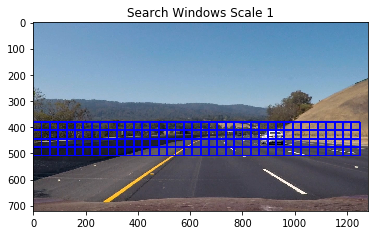

In [56]:
ystart = [380, 400, 400]
ystop = [550, 600, 700]
scales = [1 ,1.5 ,2.0]
cells_per_steps = [1, 1, 1]
colors = [(255, 255, 0), (255, 255, 0), (0, 255, 0)]

draw_image = np.copy(image)
hot_windows = find_cars(image, ystart[0], ystop[0], scales[0], cells_per_steps[0], color_space, svc,
                                X_scaler, orient, pix_per_cell, cell_per_block, spatial_size,
                                hist_bins,
                                spatial_feat,
                                hist_feat,
                        draw_image)

plt.subplot(111), plt.imshow(draw_image)
plt.title('Search Windows Scale {}'.format(scales[0]))

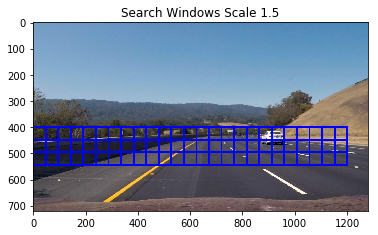

In [57]:
draw_image = np.copy(image)
idx=1
hot_windows = find_cars(image, ystart[idx], ystop[idx], scales[idx], cells_per_steps[idx], color_space, svc,
                                X_scaler, orient, pix_per_cell, cell_per_block, spatial_size,
                                hist_bins,
                                spatial_feat,
                                hist_feat,
                        draw_image)

plt.subplot(111), plt.imshow(draw_image)
plt.title('Search Windows Scale {}'.format(scales[idx]))

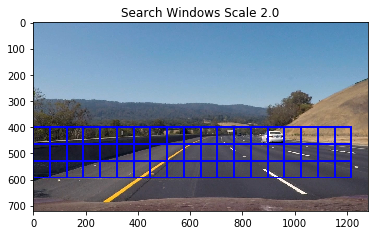

In [58]:
draw_image = np.copy(image)
idx=2
hot_windows = find_cars(image, ystart[idx], ystop[idx], scales[idx], cells_per_steps[idx], color_space, svc,
                                X_scaler, orient, pix_per_cell, cell_per_block, spatial_size,
                                hist_bins,
                                spatial_feat,
                                hist_feat,
                        draw_image)

plt.subplot(111), plt.imshow(draw_image)
plt.title('Search Windows Scale {}'.format(scales[idx]))

In [ ]:
## test images

In [75]:
## help functions

def process(image,
            color_space, svc,
            X_scaler, orient, pix_per_cell, cell_per_block, spatial_size,
            hist_bins,
            spatial_feat,
            hist_feat
            ):
    # Check the prediction time for a single sample
    t = time.time()


    # ystart = 400
    # ystop = 700
    # scale = 2.0
    # scales = [1.0,  2.0, 2.5]
    # cells_per_steps = [2,  1, 2]
    # colors = [(0, 0, 255),  (0, 255, 0), (255, 0, 255)]
    # scales = [1.0, 1.5, 2.0, 2.5]
    # cells_per_steps = [1, 1, 1, 1]
    # colors = [(0, 0, 255), (255, 255, 0), (0, 255, 0), (255, 0, 255)]
    ystart = [380, 400, 400]
    ystop = [550, 600, 656]
    scales = [1 ,1.5 ,2.0]
    cells_per_steps = [2, 2, 1]
    colors = [(255, 255, 0), (255, 255, 0), (0, 255, 0), (255, 0, 255)]

    hot_windows_list = []
    hot_windows_list2 = []
    index = 0
    for scale in scales:
        tt = time.time()
        hot_windows = find_cars(image, ystart[index], ystop[index], scale, cells_per_steps[index], color_space, svc,
                                X_scaler, orient, pix_per_cell, cell_per_block, spatial_size,
                                hist_bins,
                                spatial_feat,
                                hist_feat)
        index += 1
        tt2 = time.time()
        # print(round(tt2 - tt, 2), 'Seconds Scale {}'.format(scale))
        hot_windows_list.append(hot_windows)
        hot_windows_list2.extend(hot_windows)

    t2 = time.time()
#     print('Total', round(t2 - t, 2), 'Seconds to Search ...')

    if False:
        idx = 0
        draw_image = np.copy(image)
        for hot_wins in hot_windows_list:
            window_img = draw_boxes(draw_image, hot_wins, color=colors[idx], thick=6)
            idx += 1
            win_num = 100 + len(hot_windows_list) * 10 + idx
            plt.subplot(win_num), plt.imshow(window_img)
            plt.title('scale \n{}'.format(scales[idx - 1]))

        plt.show()

    heat = np.zeros_like(image[:, :, 0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat, hot_windows_list2)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat, 2)

    # Visualize the heatmap when displaying
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    # draw_img = draw_labeled_bboxes(np.copy(image), labels)

    return hot_windows_list2, heatmap, labels

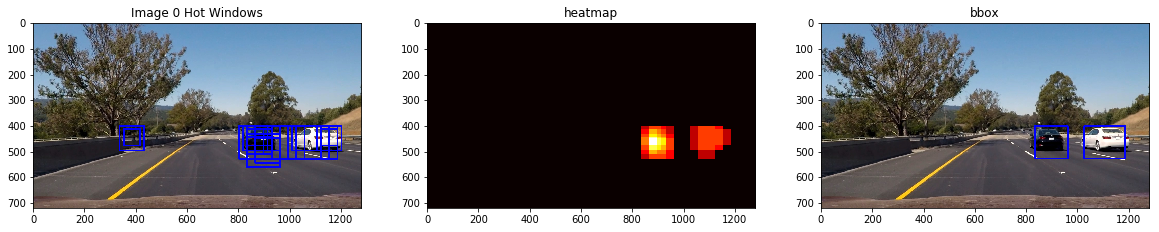

In [76]:
images = [
#               './test_images/test1.jpg',
#               './test_images/test2.jpg',
#               './test_images/test3.jpg',
#               './test_images/test4.jpg',
#               './test_images/test5.jpg',
              './test_images/test6.jpg'
    ]

idx = 0
fig = plt.figure()
plt.figure(figsize=(20, 10))
for image_fn in images:
    image = mpimg.imread(image_fn)
    hot_windows_list2, heatmap, labels = process(image,
            color_space, svc,
            X_scaler, orient, pix_per_cell, cell_per_block, spatial_size,
            hist_bins,
            spatial_feat,
            hist_feat)

    # win_num = 100+len(hot_windows_list2)*10+idx  #131
    draw_image = np.copy(image)
    window_img = draw_boxes(draw_image, hot_windows_list2, color=(0, 0, 255), thick=6)

    plt.subplot(len(images), 3, idx*3+1), plt.imshow(window_img)

    plt.title('Image {} Hot Windows'.format(idx))
    # plot heatmap
    plt.subplot(len(images), 3, idx * 3 + 2), plt.imshow(heatmap, cmap='hot')
    plt.title('heatmap')
    # draw cars bbox
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    plt.subplot(len(images), 3, idx * 3 + 3), plt.imshow(draw_img)
    plt.title('bbox')

    idx += 1

In [77]:
## video

In [78]:
## help function

def process_image(image):
    hot_windows, heatmap, labels = process(image,
                                            color_space, svc,
                                            X_scaler, orient, pix_per_cell, cell_per_block, spatial_size,
                                            hist_bins,
                                            spatial_feat,
                                            hist_feat)
    result = draw_labeled_bboxes(np.copy(image), labels)
    return result

In [79]:
white_output = 'output_videos/project_video.mp4'

clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video output_videos/project_video.mp4
[MoviePy] Writing video output_videos/project_video.mp4




  0%|          | 0/1261 [00:00<?, ?it/s]

  0%|          | 1/1261 [00:00<13:37,  1.54it/s]

  0%|          | 2/1261 [00:01<13:36,  1.54it/s]

  0%|          | 3/1261 [00:01<13:23,  1.57it/s]

  0%|          | 4/1261 [00:02<13:11,  1.59it/s]

  0%|          | 5/1261 [00:03<13:03,  1.60it/s]

  0%|          | 6/1261 [00:03<13:06,  1.60it/s]

  1%|          | 7/1261 [00:04<12:56,  1.62it/s]

  1%|          | 8/1261 [00:04<12:53,  1.62it/s]

  1%|          | 9/1261 [00:05<13:07,  1.59it/s]

  1%|          | 10/1261 [00:06<13:15,  1.57it/s]

  1%|          | 11/1261 [00:06<13:13,  1.58it/s]

  1%|          | 12/1261 [00:07<13:11,  1.58it/s]

  1%|          | 13/1261 [00:08<13:07,  1.58it/s]

  1%|          | 14/1261 [00:08<13:15,  1.57it/s]

  1%|          | 15/1261 [00:09<13:24,  1.55it/s]

  1%|▏         | 16/1261 [00:10<13:25,  1.55it/s]

  1%|▏         | 17/1261 [00:10<13:52,  1.49it/s]

  1%|▏         | 18/1261 [00:11<13:55,  1.49it/s]

  2%|▏         | 19/1261 [00:12<14:50,  1.39it/

 11%|█▏        | 143/1261 [01:40<12:29,  1.49it/s]

 11%|█▏        | 144/1261 [01:41<12:20,  1.51it/s]

 11%|█▏        | 145/1261 [01:42<12:23,  1.50it/s]

 12%|█▏        | 146/1261 [01:42<12:18,  1.51it/s]

 12%|█▏        | 147/1261 [01:43<12:43,  1.46it/s]

 12%|█▏        | 148/1261 [01:44<13:27,  1.38it/s]

 12%|█▏        | 149/1261 [01:44<13:21,  1.39it/s]

 12%|█▏        | 150/1261 [01:45<13:19,  1.39it/s]

 12%|█▏        | 151/1261 [01:46<13:30,  1.37it/s]

 12%|█▏        | 152/1261 [01:47<13:33,  1.36it/s]

 12%|█▏        | 153/1261 [01:47<13:13,  1.40it/s]

 12%|█▏        | 154/1261 [01:48<13:05,  1.41it/s]

 12%|█▏        | 155/1261 [01:49<13:09,  1.40it/s]

 12%|█▏        | 156/1261 [01:50<13:35,  1.35it/s]

 12%|█▏        | 157/1261 [01:50<13:21,  1.38it/s]

 13%|█▎        | 158/1261 [01:51<13:00,  1.41it/s]

 13%|█▎        | 159/1261 [01:52<12:43,  1.44it/s]

 13%|█▎        | 160/1261 [01:52<12:31,  1.47it/s]

 13%|█▎        | 161/1261 [01:53<12:34,  1.46it/s]

 13%|█▎     

 23%|██▎       | 284/1261 [03:17<12:36,  1.29it/s]

 23%|██▎       | 285/1261 [03:18<12:39,  1.28it/s]

 23%|██▎       | 286/1261 [03:19<12:44,  1.28it/s]

 23%|██▎       | 287/1261 [03:20<12:49,  1.27it/s]

 23%|██▎       | 288/1261 [03:21<12:33,  1.29it/s]

 23%|██▎       | 289/1261 [03:21<12:25,  1.30it/s]

 23%|██▎       | 290/1261 [03:22<12:21,  1.31it/s]

 23%|██▎       | 291/1261 [03:23<12:21,  1.31it/s]

 23%|██▎       | 292/1261 [03:23<11:55,  1.35it/s]

 23%|██▎       | 293/1261 [03:24<11:53,  1.36it/s]

 23%|██▎       | 294/1261 [03:25<12:01,  1.34it/s]

 23%|██▎       | 295/1261 [03:26<11:54,  1.35it/s]

 23%|██▎       | 296/1261 [03:26<11:32,  1.39it/s]

 24%|██▎       | 297/1261 [03:27<11:19,  1.42it/s]

 24%|██▎       | 298/1261 [03:28<11:01,  1.45it/s]

 24%|██▎       | 299/1261 [03:28<10:47,  1.49it/s]

 24%|██▍       | 300/1261 [03:29<10:52,  1.47it/s]

 24%|██▍       | 301/1261 [03:30<10:53,  1.47it/s]

 24%|██▍       | 302/1261 [03:30<10:48,  1.48it/s]

 24%|██▍    

 34%|███▎      | 425/1261 [04:54<09:27,  1.47it/s]

 34%|███▍      | 426/1261 [04:55<09:17,  1.50it/s]

 34%|███▍      | 427/1261 [04:55<09:37,  1.44it/s]

 34%|███▍      | 428/1261 [04:56<09:47,  1.42it/s]

 34%|███▍      | 429/1261 [04:57<09:51,  1.41it/s]

 34%|███▍      | 430/1261 [04:58<09:57,  1.39it/s]

 34%|███▍      | 431/1261 [04:58<09:56,  1.39it/s]

 34%|███▍      | 432/1261 [04:59<10:02,  1.38it/s]

 34%|███▍      | 433/1261 [05:00<09:53,  1.39it/s]

 34%|███▍      | 434/1261 [05:01<09:50,  1.40it/s]

 34%|███▍      | 435/1261 [05:01<09:47,  1.41it/s]

 35%|███▍      | 436/1261 [05:02<09:41,  1.42it/s]

 35%|███▍      | 437/1261 [05:03<09:31,  1.44it/s]

 35%|███▍      | 438/1261 [05:03<09:25,  1.46it/s]

 35%|███▍      | 439/1261 [05:04<09:17,  1.48it/s]

 35%|███▍      | 440/1261 [05:05<09:08,  1.50it/s]

 35%|███▍      | 441/1261 [05:05<09:25,  1.45it/s]

 35%|███▌      | 442/1261 [05:06<09:22,  1.46it/s]

 35%|███▌      | 443/1261 [05:07<09:11,  1.48it/s]

 35%|███▌   

 45%|████▍     | 566/1261 [06:29<08:15,  1.40it/s]

 45%|████▍     | 567/1261 [06:30<08:05,  1.43it/s]

 45%|████▌     | 568/1261 [06:31<07:59,  1.44it/s]

 45%|████▌     | 569/1261 [06:31<07:51,  1.47it/s]

 45%|████▌     | 570/1261 [06:32<07:49,  1.47it/s]

 45%|████▌     | 571/1261 [06:33<07:43,  1.49it/s]

 45%|████▌     | 572/1261 [06:33<07:55,  1.45it/s]

 45%|████▌     | 573/1261 [06:34<07:55,  1.45it/s]

 46%|████▌     | 574/1261 [06:35<07:43,  1.48it/s]

 46%|████▌     | 575/1261 [06:35<07:32,  1.51it/s]

 46%|████▌     | 576/1261 [06:36<07:25,  1.54it/s]

 46%|████▌     | 577/1261 [06:37<07:18,  1.56it/s]

 46%|████▌     | 578/1261 [06:37<07:15,  1.57it/s]

 46%|████▌     | 579/1261 [06:38<07:15,  1.57it/s]

 46%|████▌     | 580/1261 [06:38<07:16,  1.56it/s]

 46%|████▌     | 581/1261 [06:39<07:20,  1.54it/s]

 46%|████▌     | 582/1261 [06:40<07:25,  1.52it/s]

 46%|████▌     | 583/1261 [06:40<07:20,  1.54it/s]

 46%|████▋     | 584/1261 [06:41<07:20,  1.54it/s]

 46%|████▋  

 56%|█████▌    | 707/1261 [08:05<06:43,  1.37it/s]

 56%|█████▌    | 708/1261 [08:05<06:44,  1.37it/s]

 56%|█████▌    | 709/1261 [08:06<06:38,  1.38it/s]

 56%|█████▋    | 710/1261 [08:07<06:30,  1.41it/s]

 56%|█████▋    | 711/1261 [08:07<06:28,  1.42it/s]

 56%|█████▋    | 712/1261 [08:08<06:34,  1.39it/s]

 57%|█████▋    | 713/1261 [08:09<06:22,  1.43it/s]

 57%|█████▋    | 714/1261 [08:09<06:12,  1.47it/s]

 57%|█████▋    | 715/1261 [08:10<06:08,  1.48it/s]

 57%|█████▋    | 716/1261 [08:11<06:07,  1.48it/s]

 57%|█████▋    | 717/1261 [08:11<06:01,  1.50it/s]

 57%|█████▋    | 718/1261 [08:12<05:53,  1.54it/s]

 57%|█████▋    | 719/1261 [08:13<05:48,  1.56it/s]

 57%|█████▋    | 720/1261 [08:13<05:50,  1.54it/s]

 57%|█████▋    | 721/1261 [08:14<05:59,  1.50it/s]

 57%|█████▋    | 722/1261 [08:15<05:50,  1.54it/s]

 57%|█████▋    | 723/1261 [08:15<05:41,  1.58it/s]

 57%|█████▋    | 724/1261 [08:16<05:40,  1.58it/s]

 57%|█████▋    | 725/1261 [08:16<05:35,  1.60it/s]

 58%|█████▊ 

 67%|██████▋   | 848/1261 [09:44<04:36,  1.50it/s]

 67%|██████▋   | 849/1261 [09:45<04:38,  1.48it/s]

 67%|██████▋   | 850/1261 [09:45<04:44,  1.45it/s]

 67%|██████▋   | 851/1261 [09:46<04:47,  1.42it/s]

 68%|██████▊   | 852/1261 [09:47<04:57,  1.38it/s]

 68%|██████▊   | 853/1261 [09:48<04:52,  1.39it/s]

 68%|██████▊   | 854/1261 [09:48<04:53,  1.39it/s]

 68%|██████▊   | 855/1261 [09:49<04:51,  1.39it/s]

 68%|██████▊   | 856/1261 [09:50<04:41,  1.44it/s]

 68%|██████▊   | 857/1261 [09:50<04:39,  1.45it/s]

 68%|██████▊   | 858/1261 [09:51<04:37,  1.45it/s]

 68%|██████▊   | 859/1261 [09:52<04:28,  1.50it/s]

 68%|██████▊   | 860/1261 [09:52<04:23,  1.52it/s]

 68%|██████▊   | 861/1261 [09:53<04:21,  1.53it/s]

 68%|██████▊   | 862/1261 [09:54<04:22,  1.52it/s]

 68%|██████▊   | 863/1261 [09:54<04:28,  1.48it/s]

 69%|██████▊   | 864/1261 [09:55<04:28,  1.48it/s]

 69%|██████▊   | 865/1261 [09:56<04:25,  1.49it/s]

 69%|██████▊   | 866/1261 [09:56<04:24,  1.49it/s]

 69%|██████▉

 78%|███████▊  | 989/1261 [11:19<02:57,  1.53it/s]

 79%|███████▊  | 990/1261 [11:20<02:55,  1.54it/s]

 79%|███████▊  | 991/1261 [11:21<02:54,  1.55it/s]

 79%|███████▊  | 992/1261 [11:21<02:56,  1.52it/s]

 79%|███████▊  | 993/1261 [11:22<03:01,  1.47it/s]

 79%|███████▉  | 994/1261 [11:23<03:04,  1.45it/s]

 79%|███████▉  | 995/1261 [11:24<03:05,  1.43it/s]

 79%|███████▉  | 996/1261 [11:24<03:06,  1.42it/s]

 79%|███████▉  | 997/1261 [11:25<03:07,  1.41it/s]

 79%|███████▉  | 998/1261 [11:26<03:05,  1.42it/s]

 79%|███████▉  | 999/1261 [11:26<03:03,  1.42it/s]

 79%|███████▉  | 1000/1261 [11:27<03:03,  1.42it/s]

 79%|███████▉  | 1001/1261 [11:28<03:03,  1.41it/s]

 79%|███████▉  | 1002/1261 [11:28<03:00,  1.43it/s]

 80%|███████▉  | 1003/1261 [11:29<03:04,  1.40it/s]

 80%|███████▉  | 1004/1261 [11:30<02:58,  1.44it/s]

 80%|███████▉  | 1005/1261 [11:31<02:55,  1.46it/s]

 80%|███████▉  | 1006/1261 [11:31<02:57,  1.44it/s]

 80%|███████▉  | 1007/1261 [11:32<02:52,  1.47it/s]

 80%

 89%|████████▉ | 1128/1261 [12:53<01:26,  1.54it/s]

 90%|████████▉ | 1129/1261 [12:53<01:24,  1.57it/s]

 90%|████████▉ | 1130/1261 [12:54<01:23,  1.56it/s]

 90%|████████▉ | 1131/1261 [12:55<01:22,  1.58it/s]

 90%|████████▉ | 1132/1261 [12:55<01:22,  1.56it/s]

 90%|████████▉ | 1133/1261 [12:56<01:21,  1.57it/s]

 90%|████████▉ | 1134/1261 [12:57<01:21,  1.57it/s]

 90%|█████████ | 1135/1261 [12:57<01:23,  1.51it/s]

 90%|█████████ | 1136/1261 [12:58<01:22,  1.51it/s]

 90%|█████████ | 1137/1261 [12:59<01:19,  1.56it/s]

 90%|█████████ | 1138/1261 [12:59<01:17,  1.59it/s]

 90%|█████████ | 1139/1261 [13:00<01:16,  1.59it/s]

 90%|█████████ | 1140/1261 [13:00<01:16,  1.59it/s]

 90%|█████████ | 1141/1261 [13:01<01:16,  1.56it/s]

 91%|█████████ | 1142/1261 [13:02<01:15,  1.58it/s]

 91%|█████████ | 1143/1261 [13:02<01:16,  1.55it/s]

 91%|█████████ | 1144/1261 [13:03<01:18,  1.49it/s]

 91%|█████████ | 1145/1261 [13:04<01:17,  1.51it/s]

 91%|█████████ | 1146/1261 [13:04<01:14,  1.54

[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/project_video.mp4 

